In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [3]:
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [4]:
 df.isnull().sum() 

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [5]:
# Change the data type of 'Screen_Size_cm' and 'Weight_kg' to float
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
df['Weight_kg'] = df['Weight_kg'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [6]:
# Conversion factors
cm_to_inch = 0.393701
kg_to_pound = 2.20462

# Convert screen size from cm to inches and rename column
df['Screen_Size_inch'] = df['Screen_Size_cm'] * cm_to_inch

# Convert weight from kg to pounds and rename column
df['Weight_pounds'] = df['Weight_kg'] * kg_to_pound

# Drop old columns
df.drop(columns=['Screen_Size_cm', 'Weight_kg'], inplace=True)

# Display modified DataFrame
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds
0,0,Acer,4,IPS Panel,2,1,5,1.6,8,256,978,14.000008,3.527392
1,1,Dell,3,Full HD,1,1,3,2.0,4,256,634,15.600008,4.850164
2,2,Dell,3,Full HD,1,1,7,2.7,8,256,946,15.600008,4.850164
3,3,Dell,4,IPS Panel,2,1,5,1.6,8,128,1244,13.300007,2.689636
4,4,HP,4,Full HD,2,1,7,1.8,8,256,837,15.600008,4.210824


In [7]:
# Normalize CPU_frequency
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

In [8]:
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds
0,0,Acer,4,IPS Panel,2,1,5,0.551724,8,256,978,14.000008,3.527392
1,1,Dell,3,Full HD,1,1,3,0.689655,4,256,634,15.600008,4.850164
2,2,Dell,3,Full HD,1,1,7,0.931034,8,256,946,15.600008,4.850164
3,3,Dell,4,IPS Panel,2,1,5,0.551724,8,128,1244,13.300007,2.689636
4,4,HP,4,Full HD,2,1,7,0.620690,8,256,837,15.600008,4.210824


## Building the prompt: Categorical to numerical
    
For predictive modeling, the categorical variables are not usable currently. So, you must convert the important categorical variables into indicator numerical variables. Indicator variables are typically new attributes, with content being 1 for the indicated category and 0 for all others. Once you create the indicator variables, you may drop the original attribute.

For example, assume that attribute Screen needs to be converted into individual indicator variables for each entry. Once done, the attribute Screen needs to be dropped.

In [9]:
# Convert 'Screen' into indicator variables
df1 = pd.get_dummies(df['Screen'], prefix='Screen')

# Append df1 into df
df = pd.concat([df, df1], axis=1)

# Drop the original 'Screen' column
df.drop('Screen',axis=1, inplace=True)

In [10]:
# Convert Price from USD to EUR
usd_to_eur = 0.97  # Exchange rate from USD to EUR now
df['Price'] = df['Price'] * usd_to_eur


In [11]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds,Screen_Full HD,Screen_IPS Panel
0,0,Acer,4,2,1,5,0.551724,8,256,948.66,14.000008,3.527392,0,1
1,1,Dell,3,1,1,3,0.689655,4,256,614.98,15.600008,4.850164,1,0
2,2,Dell,3,1,1,7,0.931034,8,256,917.62,15.600008,4.850164,1,0
3,3,Dell,4,2,1,5,0.551724,8,128,1206.68,13.300007,2.689636,0,1
4,4,HP,4,2,1,7,0.620690,8,256,811.89,15.600008,4.210824,1,0


In [12]:
# Perform min-max normalization on CPU_frequency
minvalue= df['CPU_frequency'].min()
maxvalue= df['CPU_frequency'].max()
df['CPU_frequency'] = (df['CPU_frequency'] - minvalue) / (maxvalue- minvalue)
df['CPU_frequency']

0      0.235294
1      0.470588
2      0.882353
3      0.235294
4      0.352941
         ...   
233    0.823529
234    0.705882
235    0.823529
236    0.764706
237    0.647059
Name: CPU_frequency, Length: 238, dtype: float64

In [13]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Price,Screen_Size_inch,Weight_pounds,Screen_Full HD,Screen_IPS Panel
0,0,Acer,4,2,1,5,0.235294,8,256,948.66,14.000008,3.527392,0,1
1,1,Dell,3,1,1,3,0.470588,4,256,614.98,15.600008,4.850164,1,0
2,2,Dell,3,1,1,7,0.882353,8,256,917.62,15.600008,4.850164,1,0
3,3,Dell,4,2,1,5,0.235294,8,128,1206.68,13.300007,2.689636,0,1
4,4,HP,4,2,1,7,0.352941,8,256,811.89,15.600008,4.210824,1,0


## Generative AI for Data Insights

In [14]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [15]:
df1 = pd.read_csv(URL1)
df1.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [16]:
df1 = df1.drop(df1.columns[:2], axis=1)
df1.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


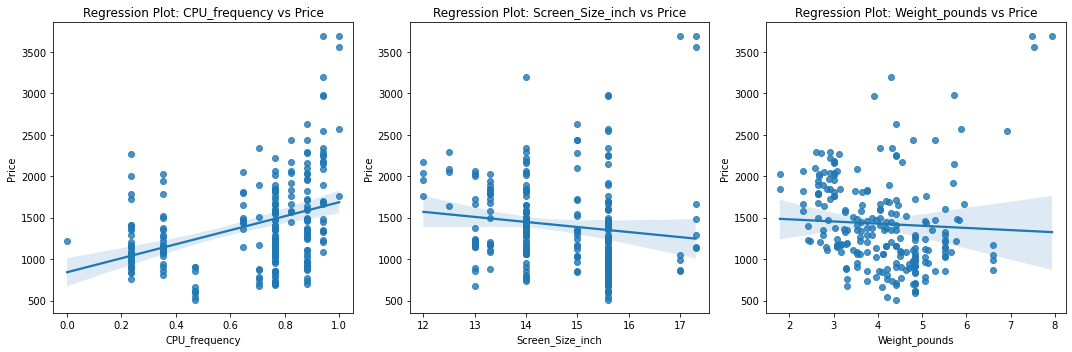

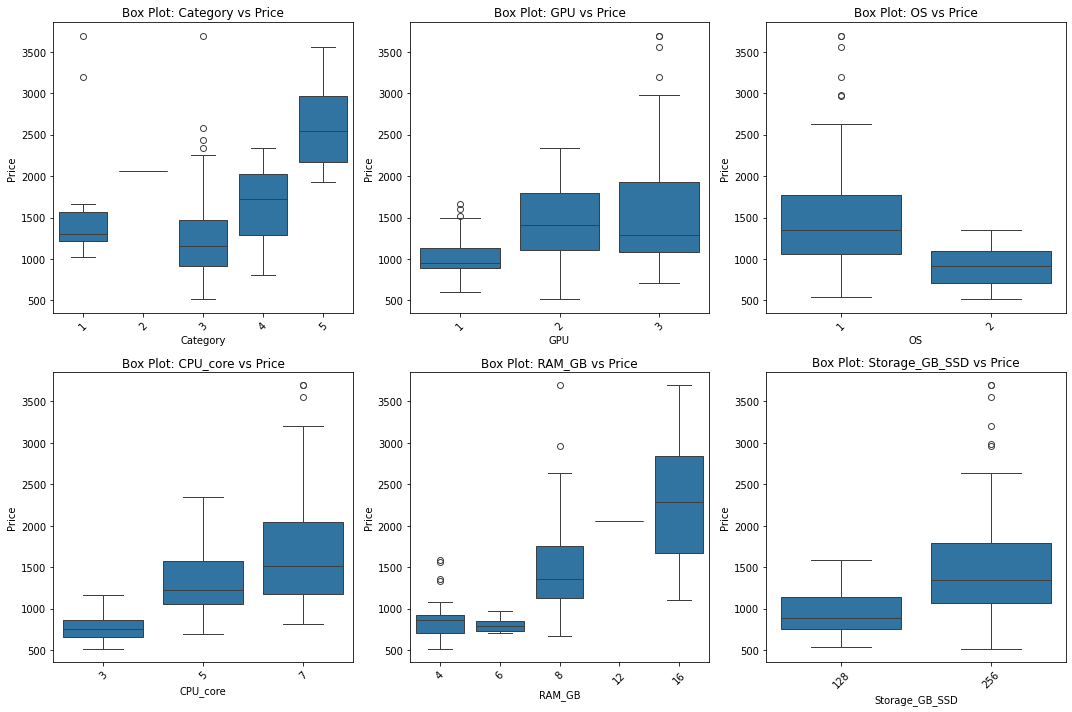

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [17]:
# Create regression plots for CPU_frequency, Screen_Size_inch, and Weight_pounds against Price
plt.figure(figsize=(15, 5))
for i, col in enumerate(['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']):
    plt.subplot(1, 3, i+1)
    sns.regplot(x=df[col], y=df['Price'])
    plt.title(f'Regression Plot: {col} vs Price')
plt.tight_layout()
plt.show()

# Create box plots for categorical attributes against Price
categorical_cols = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], y=df['Price'])
    plt.xticks(rotation=45)
    plt.title(f'Box Plot: {col} vs Price')
plt.tight_layout()
plt.show()

# Display modified DataFrame
df1.head()


In [18]:
from scipy.stats import pearsonr

# Evaluate correlation, Pearson coefficient, and p-values for numerical attributes against Price
numerical_cols = df1.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('Price')  # Exclude target variable

correlation_data = []
for col in numerical_cols:
    pearson_coef, p_value = pearsonr(df1[col], df1['Price'])
    correlation_data.append({'Attribute': col, 'Correlation': df1[col].corr(df1['Price']), 'Pearson Coefficient': pearson_coef, 'P-Value': p_value})

correlation_df = pd.DataFrame(correlation_data)
print(correlation_df)


           Attribute  Correlation  Pearson Coefficient       P-Value
0           Category     0.286243             0.286243  7.225696e-06
1                GPU     0.288298             0.288298  6.166950e-06
2                 OS    -0.221730            -0.221730  5.696643e-04
3           CPU_core     0.459398             0.459398  7.912950e-14
4   Screen_Size_inch    -0.110644            -0.110644  8.853398e-02
5      CPU_frequency     0.366666             0.366666  5.502463e-09
6             RAM_GB     0.549297             0.549297  3.681561e-20
7     Storage_GB_SSD     0.243421             0.243421  1.489892e-04
8      Weight_pounds    -0.050312            -0.050312  4.397694e-01
9     Screen-Full_HD    -0.021075            -0.021075  7.463568e-01
10  Screen-IPS_panel     0.021075             0.021075  7.463568e-01


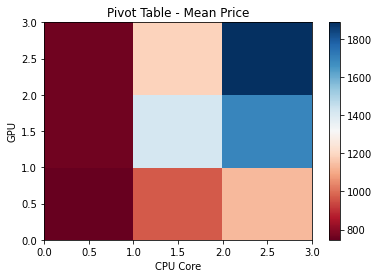

In [19]:

# Group the attributes
grouped_data = df1.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

In [20]:
df1.corr()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
Category,1.000000,-0.114174,-0.043378,0.232425,-0.285392,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.117608,0.117608
GPU,-0.114174,1.000000,-0.199549,0.145388,0.154251,0.291439,0.218973,0.094288,0.262853,0.288298,-0.089582,0.089582
OS,-0.043378,-0.199549,1.000000,0.016954,0.146695,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.172891,-0.172891
CPU_core,0.232425,0.145388,0.016954,1.000000,0.041092,0.242722,0.473075,0.400015,0.068599,0.459398,0.003837,-0.003837
Screen_Size_inch,-0.285392,0.154251,0.146695,0.041092,1.000000,-0.000948,0.018194,0.119699,0.797534,-0.110644,0.342912,-0.342912
CPU_frequency,-0.053414,0.291439,0.050407,0.242722,-0.000948,1.000000,0.226736,0.035557,0.066522,0.366666,0.055273,-0.055273
RAM_GB,0.030127,0.218973,-0.074625,0.473075,0.018194,0.226736,1.000000,0.361469,0.055068,0.549297,0.017913,-0.017913
Storage_GB_SSD,0.038246,0.094288,0.007751,0.400015,0.119699,0.035557,0.361469,1.000000,0.112519,0.243421,0.061402,-0.061402
Weight_pounds,-0.381032,0.262853,0.120858,0.068599,0.797534,0.066522,0.055068,0.112519,1.000000,-0.050312,0.117909,-0.117909
Price,0.286243,0.288298,-0.221730,0.459398,-0.110644,0.366666,0.549297,0.243421,-0.050312,1.000000,-0.021075,0.021075


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assume you have a pandas data frame called 'data_frame' with two columns: 'source_variable' and 'target_variable'

# Extract the source variable and target variable from the data frame
X = df1[['CPU_core']]
y = df1['Price']

# Initialize lists to store the MSE and R^2 values for each model
mse_values = []
r2_values = []

# Loop through the polynomial orders
for order in [2, 3, 5]:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=order)
    X_poly = polynomial_features.fit_transform(X)

    # Initialize a linear regression model
    model = LinearRegression()

    # Train the model using the polynomial features and target variable
    model.fit(X_poly, y)

    # Make predictions using the trained model
    y_pred = model.predict(X_poly)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y, y_pred)

    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(y, y_pred)

    # Append the MSE and R^2 values to the lists
    mse_values.append(mse)
    r2_values.append(r2)

    # Display the MSE and R^2 values for the current model
    print(f"Polynomial Order: {order}")
    print("Mean Squared Error (MSE):", mse)
    print("Coefficient of Determination (R^2):", r2)
    print()

# Compare the performance of the models
best_order = np.argmin(mse_values)
worst_order = np.argmax(r2_values)

print("Model Comparison:")
print(f"Best Polynomial Order: {best_order + 2}")
print(f"Worst Polynomial Order: {worst_order + 2}")

# Additional details:
# - The 'PolynomialFeatures' class from the 'sklearn.preprocessing' module is used to create polynomial features.
# - The 'fit_transform()' method is used to transform the source variable into polynomial features.
# - The 'degree' parameter in the 'PolynomialFeatures' class specifies the maximum degree of the polynomial features.
# - The 'argmin()' and 'argmax()' functions from the 'numpy' module are used to find the index of the minimum and maximum values in a list, respectively.

Polynomial Order: 2
Mean Squared Error (MSE): 257090.20338462724
Coefficient of Determination (R^2): 0.21806391051863183

Polynomial Order: 3
Mean Squared Error (MSE): 257090.20338462733
Coefficient of Determination (R^2): 0.2180639105186316

Polynomial Order: 5
Mean Squared Error (MSE): 257090.20338462724
Coefficient of Determination (R^2): 0.21806391051863183

Model Comparison:
Best Polynomial Order: 2
Worst Polynomial Order: 2


Model Performance Comparison:
Degree 2 → MSE: 218734.0051, R²: 0.0509
Degree 3 → MSE: 215498.3223, R²: 0.0649
Degree 5 → MSE: 220521.7919, R²: 0.0431


D:\New Folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\New Folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\New Folder\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


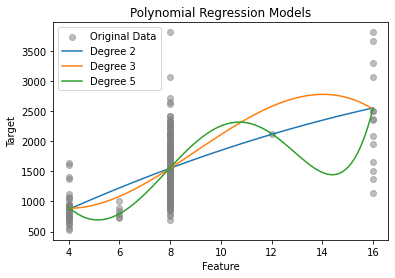

In [34]:
from sklearn.model_selection import train_test_split

# Define feature and target variable
X = df1[['RAM_GB']]
y = df1['Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degrees to test
degrees = [2, 3, 5]

# Dictionary to store model performance
performance = {}

# Plot original data
plt.scatter(X, y, color='gray', label="Original Data", alpha=0.5)

# Train models and evaluate performance
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Store performance
    performance[degree] = {'MSE': mse, 'R2': r2}

    # Plot regression line
    X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_curve_poly = poly.transform(X_curve)
    y_curve = model.predict(X_curve_poly)
    plt.plot(X_curve, y_curve, label=f"Degree {degree}")

# Display performance results
print("Model Performance Comparison:")
for degree, metrics in performance.items():
    print(f"Degree {degree} → MSE: {metrics['MSE']:.4f}, R²: {metrics['R2']:.4f}")

# Show plot
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Polynomial Regression Models")
plt.show()


In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Define feature and target variable
X = df1[['RAM_GB','CPU_frequency','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
y = df1['Price']

# Create polynomial features
polynomial_features = PolynomialFeatures()

# Transform the source variables into polynomial features
X_poly = polynomial_features.fit_transform(X)

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1,10], 'degree': [2, 3, 4]}

# Initialize a ridge regression model
model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=4)

# Train the model using the polynomial features and target variable
grid_search.fit(X_poly, y)

# Make predictions using the trained model
y_pred = grid_search.predict(X_poly)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Additional details:
# - The 'PolynomialFeatures' class from the 'sklearn.preprocessing' module is used to create polynomial features.
# - The 'GridSearchCV' class from the 'sklearn.model_selection' module is used to perform grid search with cross-validation.
# - The 'Ridge' class from the 'sklearn.linear_model' module is used for ridge regression.
# - The 'fit_transform()' method is used to transform the source variables into polynomial features.
# - The 'param_grid' parameter in the 'GridSearchCV' class specifies the hyperparameter values to search over.
# - The 'cv' parameter in the 'GridSearchCV' class specifies the number of folds for cross-validation.
# - The best model found by grid search can be accessed using the 'best_estimator_' attribute of the grid search object.

ValueError: Invalid parameter degree for estimator Ridge(alpha=10). Check the list of available parameters with `estimator.get_params().keys()`.

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define feature and target variable
X = df1[['RAM_GB','CPU_frequency','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
y = df1['Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define polynomial degrees and alpha values for Ridge Regression
param_grid = {
    'poly__degree': [2, 3, 5],  # Polynomial feature degrees
    'ridge__alpha': [0.0001,0.001,0.01,0.1,1,10]  # Regularization strengths
}

# Create a pipeline with Polynomial Features and Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),  # Scale features to avoid numerical issues
    ('ridge', Ridge())
])

# Perform Grid Search with Cross-Validation (5-fold CV)
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model from Grid Search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", best_params)
print(f"Best Model MSE: {mse:.4f}")
print(f"Best Model R²: {r2:.4f}")


Best Parameters: {'poly__degree': 3, 'ridge__alpha': 10}
Best Model MSE: 219068.1516
Best Model R²: 0.0494
